 # 7. Galois Theory

In [1]:
from spb import (
    plot,
    plot_complex_list
)
from sympy import (
    Complexes,
    div,
    Eq,
    init_printing,
    LC,
    LM,
    LT,
    Poly,
    QQ,
    solveset,
    Symbol,
    symbols
)
from sympy.combinatorics import (
    AlternatingGroup,
    SymmetricGroup
)

init_printing(perm_cyclic = False)

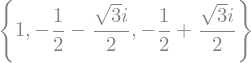

In [2]:
x = Symbol('x', real=True)

eq1 = x**3 - 1
cube_roots_1 = solveset(eq1)
cube_roots_1

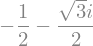

In [3]:
one, w2, w = cube_roots_1
w2

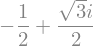

In [4]:
w

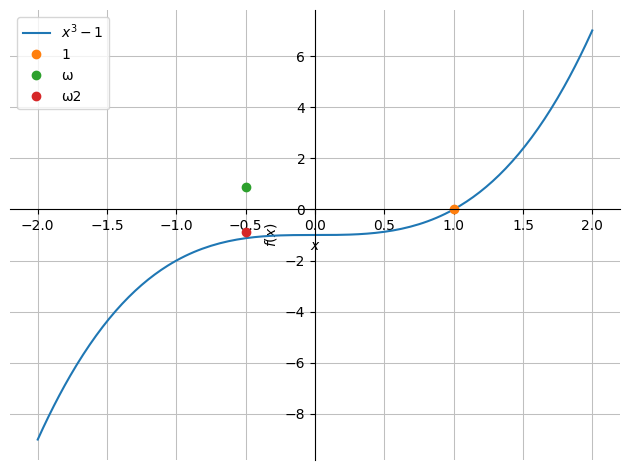

In [5]:
p1 = plot(
    eq1,
    (x, -2, 2),
    axis_center=(0, 0),
    show=False
)
p2 = plot_complex_list(
    (one, '1'),
    (w, 'ω'),
    (w2, 'ω2'),
    show=False
)
(p1 + p2).show()

In [6]:
eq2 = x**2 + 1
roots1 = solveset(eq2)
r1, r2 = roots1
r1, r2

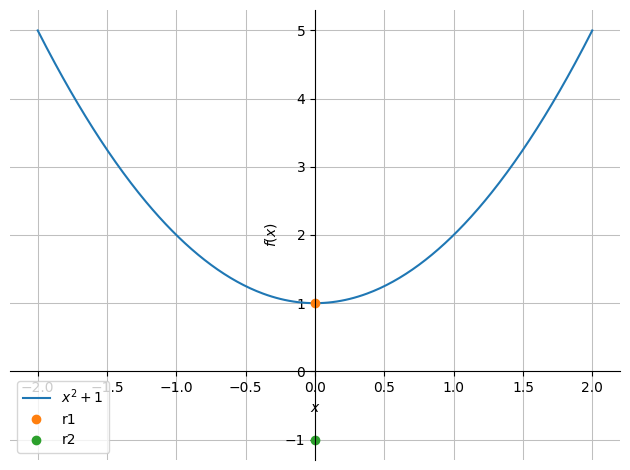

In [7]:
p3 = plot(
    eq2,
    (x, -2, 2),
    axis_center=(0, 0),
    show=False
)
p4 = plot_complex_list(
    (r1, 'r1'),
    (r2, 'r2'),
    show=False
)
(p3 + p4).show()

In [8]:
a0, a1, a2, a3, n = symbols('a_0 a_1 a_2 a_3 n', real=True)

f_x = a3*x**3 + a2*x**2 + a1*x + a0
f_x_subs = f_x.subs({a0: 1.1, a1: 2.2, a2: 3.3, a3: 4.4})
f = f_x_subs.as_poly()
f

In [9]:
f.degree()

In [10]:
LT(f)

In [11]:
LC(f)

In [12]:
LM(f)

In [13]:
f.is_irreducible

True

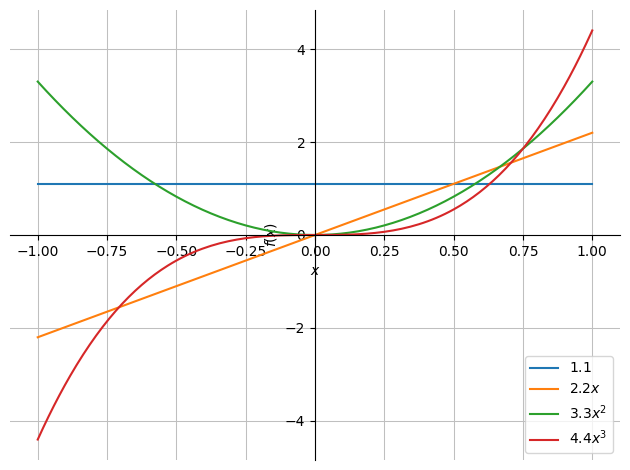

In [14]:
p5 = plot(
    *[LT(f.slice(x, x+1)) for x in range(f.length())],
    (x, -1, 1),
    axis_center=(0, 0)
)

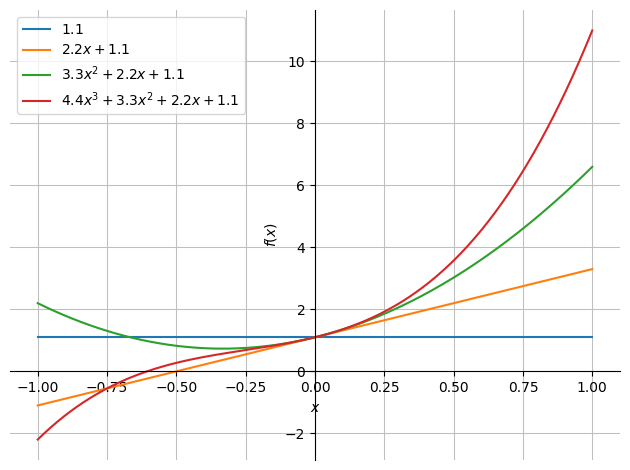

In [15]:
p6 = plot(
    *[f.slice(0, x+1).as_expr() for x in range(f.length())],
    (x, -1, 1),
    axis_center=(0, 0)
)

In [16]:
f_roots = f.all_roots()
[x.evalf() for x in f_roots]

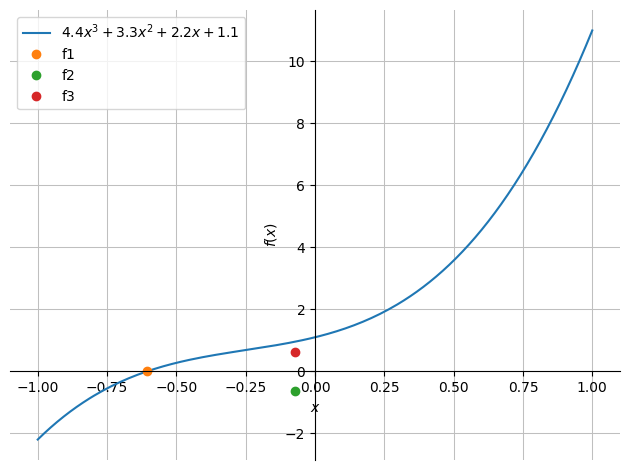

In [17]:
p7 = plot(
    f.as_expr(),
    (x, -1, 1),
    axis_center=(0, 0),
    show=False
)
p8 = plot_complex_list(
    (f_roots[0].evalf(), 'f1'),
    (f_roots[1].evalf(), 'f2'),
    (f_roots[2].evalf(), 'f3'),
    show=False
)
(p7 + p8).show()

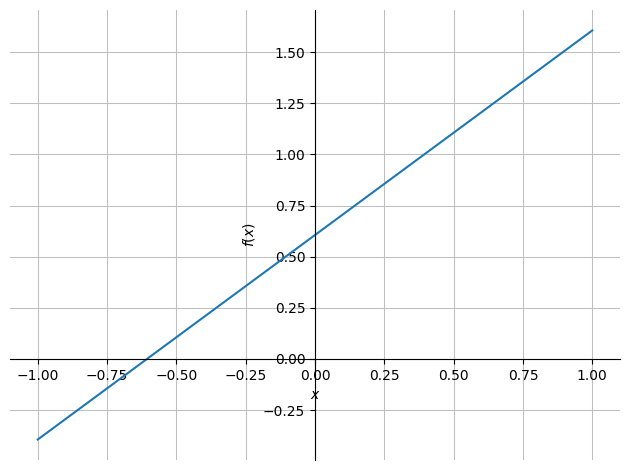

In [18]:
plot(
    (x - f_roots[0].evalf()),
    (x, -1, 1),
    axis_center=(0, 0)
)

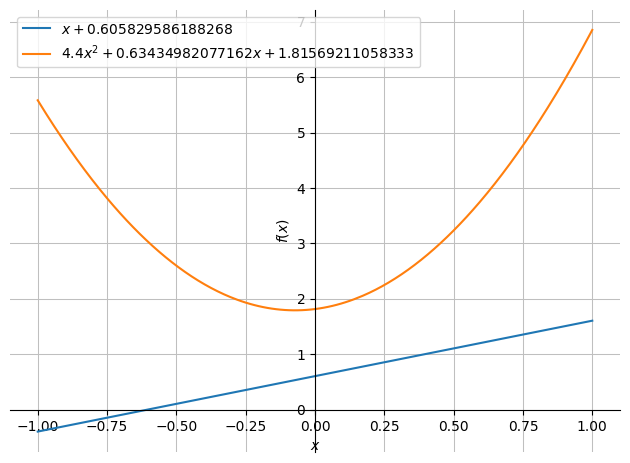

In [19]:
def factorization(f):
    a = f.all_roots()[0]
    b = x - a
    q, r = div(f, b, domain='CC')
    return b, q + r

x_a1, g1 = factorization(f)

plot(
    x_a1.evalf(),
    g1.as_expr(),
    (x, -1, 1),
    axis_center=(0, 0)
)

In [20]:
x_a2, g2 = factorization(g1)
x_a2.evalf(), g2

In [21]:
n_root_factorization = (x_a1.evalf() * x_a2.evalf() * g2)
n_root_factorization

In [22]:
Eq(
    f(0).evalf(1),
    n_root_factorization.subs(x, 0).as_real_imag()[0].evalf(1)
)

In [23]:
eq3 = Poly(x**3 - 5, x, domain='QQ')
eq3

In [24]:
eq3.degree()

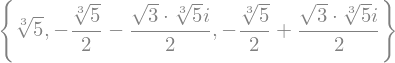

In [25]:
eq3_roots = solveset(eq3.as_expr())
eq3_roots

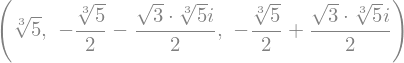

In [26]:
eq3_r1, eq3_r2, eq3_r3 = eq3_roots
eq3_r1, eq3_r2, eq3_r3

In [27]:
QQ_r1 = QQ.algebraic_field(eq3_r1)
QQ_r1

QQ<5**(1/3)>

In [28]:
QQ_r2 = QQ.algebraic_field(eq3_r2)
QQ_r2

QQ<-5**(1/3)/2 - sqrt(3)*5**(1/3)*I/2>

In [29]:
QQ_r3 = QQ.algebraic_field(eq3_r3)
QQ_r3

QQ<-5**(1/3)/2 + sqrt(3)*5**(1/3)*I/2>

In [30]:
N = QQ.algebraic_field(*eq3_roots.args)
N

QQ<-sqrt(3)*5**(1/3)*I>

In [31]:
N.ext

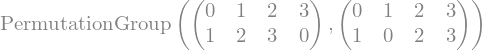

In [32]:
S4 = SymmetricGroup(4)
S4

In [33]:
len(S4.elements)

In [34]:
S4.is_solvable

True

In [35]:
G = S4.composition_series()
len(G)

In [36]:
for g in G:
    print(len(g.elements))

24
12
4
2
1


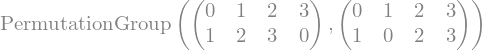

In [37]:
G[0]

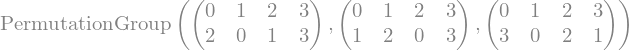

In [38]:
G[1]

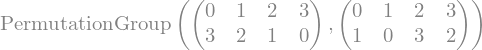

In [39]:
G[2]

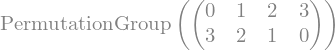

In [40]:
G[3]

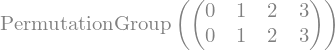

In [41]:
G[4]

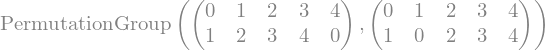

In [42]:
S5 = SymmetricGroup(5)
S5

In [43]:
len(S5.elements)

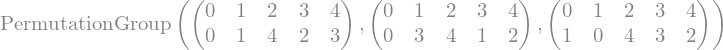

In [44]:
A5 = S5.subgroup_search(lambda x: x.is_even)
A5

In [45]:
len(A5.elements)

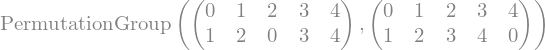

In [46]:
A5_true = AlternatingGroup(5)
A5_true

In [47]:
A5.is_subgroup(A5_true) & A5_true.is_subgroup(A5)

True

In [48]:
A5.is_normal(S5)

True

In [50]:
S5.is_solvable

False

In [51]:
A5.is_abelian

False